In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('data/Phishing_Legitimate_full.csv')
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [3]:
df.drop('id',axis=1,inplace=True)

In [4]:
df.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [5]:
# Dependent and independent differentiate
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [6]:
y.value_counts()

CLASS_LABEL
1    5000
0    5000
Name: count, dtype: int64

In [7]:
X.shape

(10000, 48)

In [8]:
y.shape

(10000,)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
# first logistic regression
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
lr=LogisticRegression(max_iter=100)
lrc=LogisticRegressionCV()

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
lr.fit(X_train,y_train)

E:\ML_IMPLEMENTATIO\ml-env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
y_pred=lr.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score,precision_score,classification_report,confusion_matrix

In [16]:
accuracy_score(y_test,y_pred)

0.917

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       988
           1       0.92      0.92      0.92      1012

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



In [18]:
lrc.fit(X_train,y_train)

E:\ML_IMPLEMENTATIO\ml-env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\ML_IMPLEMENTATIO\ml-env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

LogisticRegressionCV()

In [19]:
y_pred=lrc.predict(X_test)

In [20]:
accuracy_score(y_test,y_pred)

0.9395

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dt=DecisionTreeClassifier()

In [23]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
dt_pred=dt.predict(X_test)

In [25]:
accuracy_score(y_test,dt_pred)

0.973

In [26]:
dt_hyper=DecisionTreeClassifier()

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
# Define the hyperparameter grid for pruning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_leaf_nodes': [None, 10, 20],
    'ccp_alpha': [0.0, 0.01, 0.1]
}




In [29]:
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(dt_hyper, param_grid, cv=5, scoring='accuracy')


In [30]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1],
                         'max_depth': [3, 5, 7, 10],
                         'max_leaf_nodes': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [31]:
grid_search.best_params_

{'ccp_alpha': 0.0,
 'max_depth': 10,
 'max_leaf_nodes': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [32]:
dt_pred_hpt=grid_search.predict(X_test)

In [33]:
accuracy_score(y_test,dt_pred_hpt)

0.9755

In [34]:
print(classification_report(y_test,dt_pred_hpt))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       988
           1       0.98      0.98      0.98      1012

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [36]:
# plt.figure(figsize=(20,15))
# sns.heatmap(df.corr().round(2),annot=True,cmap='coolwarm', fmt='.2f')

In [37]:
# corr_matrix = df.corr().abs()

# # Select upper triangle of the correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# # Find features with correlation greater than 0.5
# to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

# # Plot the heatmap with the filtered columns
# plt.figure(figsize=(15, 10))
# sns.heatmap(df[to_drop].corr(), annot=True, cmap='coolwarm', fmt='.2f')
# plt.show()

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca=PCA()

In [40]:
from sklearn.svm import SVC

In [41]:
svc=SVC()

In [42]:
svc.fit(X_train,y_train)

SVC()

In [43]:
svc_pred=svc.predict(X_test)

In [44]:
accuracy_score(y_test,svc_pred)

0.8635

In [45]:
svm_parameters={
    'C': [0.1, 1, 10, 100],                # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Different kernel types
    'gamma': ['scale', 'auto'],             # Gamma for 'rbf', 'poly', 'sigmoid' kernels
    'degree': [2, 3, 4],                    # Degree for 'poly' kernel
}

In [46]:
svc_grid=GridSearchCV(SVC(),param_grid=svm_parameters,cv=5,scoring='accuracy')

In [47]:
# svc_grid.fit(X_train,y_train)
from sklearn.model_selection import RepeatedStratifiedKFold,RandomizedSearchCV

In [48]:
# param_grid = {'C': np.arange(0.1, 10, 0.1),
#               'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#               'degree': np.arange(2, 6, 1)}

# # Initialize the model
# svm = SVC(random_state=0, probability=True)

# # Repeated stratified kfold
# rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# # Initialize RandomizedSearchCV with kfold cross-validation
# random_search = RandomizedSearchCV(svm, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# # Fit the RandomizedSearchCV to the training data
# random_search.fit(X_train, y_train)

# # Select the best hyperparameters
# best_params = random_search.best_params_
# print("Best hyperparameters: ", best_params)

In [49]:
# svm_two=SVC(kernel= 'linear', degree= 2, C=5.4)

In [50]:
# svm_two.fit(X_train,y_train)

In [51]:
# svc_pred=svm_two.predict(X_test)

In [52]:
# accuracy_score(y_test,svc_pred)

In [53]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, F1_train, F1_test
    '''

    # Fit the model to the training data.
    model.fit(x_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [54]:
import xgboost as xgb

In [55]:
xgb_model = xgb.XGBClassifier()


In [56]:
# pip install tabulate


Confusion Matrix:


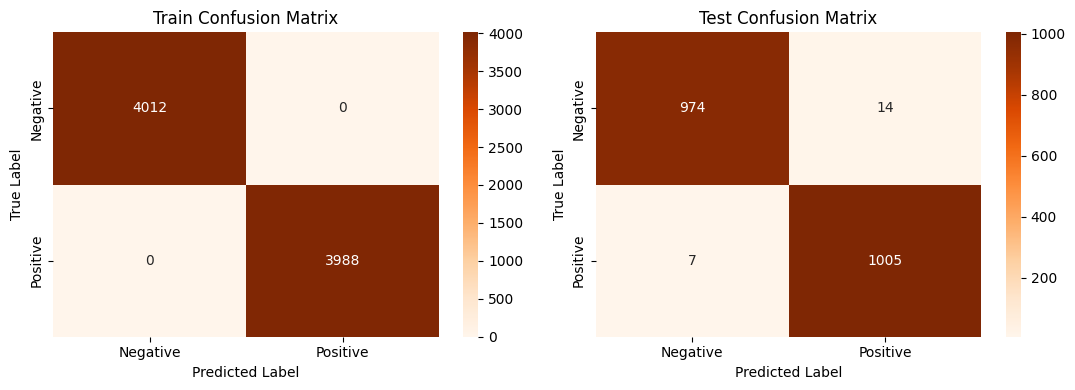


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |      4012 |
| 1            |           1 |        1 |          1 |      3988 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |      8000 |
| weighted avg |           1 |        1 |          1 |      8000 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.992864 | 0.98583  |   0.989335 |  988      |
| 1            |    0.986261 | 0.993083 |   0.98966  | 1012      |
| accuracy     |    0.9895   | 0.9895   |   0.9895   |    0.9895 |
| macro avg    |    0.989563 | 0.989456 |   0.989497 | 2000      |
| weighted avg |    0.989523 | 0.9895   |   0.989499 | 2000      |


In [57]:
xgb_score = evaluate_model(xgb_model, X_train, X_test, y_train, y_test)
